In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [ ]:
camp=pd.read_csv('/content/drive/MyDrive/campaign_desc.csv')
camp.count()

DESCRIPTION    30
CAMPAIGN       30
START_DAY      30
END_DAY        30
dtype: int64

In [ ]:
camp.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [ ]:
camp_tab=pd.read_csv('/content/drive/MyDrive/campaign_table.csv')
camp_tab.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [ ]:
camp_tab.count()

DESCRIPTION      7208
household_key    7208
CAMPAIGN         7208
dtype: int64

In [ ]:
hh_camp=pd.DataFrame(camp_tab.groupby(['household_key'])['CAMPAIGN'].count()).reset_index()
hh_camp=hh_camp['CAMPAIGN'].sort_values(ascending=False)
camp_count=hh_camp.head(10).reset_index()
camp_count=camp_count[['CAMPAIGN','index']]

In [ ]:
camp_count['index']=camp_count['index'].astype(str)

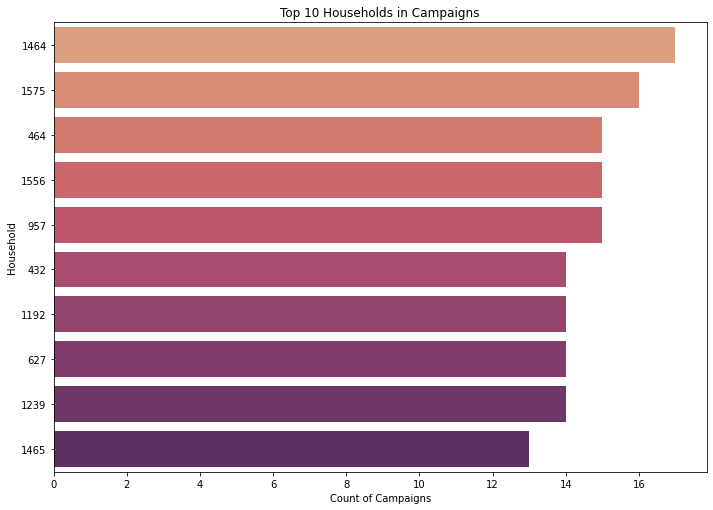

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(x=camp_count['CAMPAIGN'],y=camp_count['index'],orient='h',palette='flare')
ax.set(ylabel='Household', xlabel='Count of Campaigns')
plt.title('Top 10 Households in Campaigns')
plt.show()

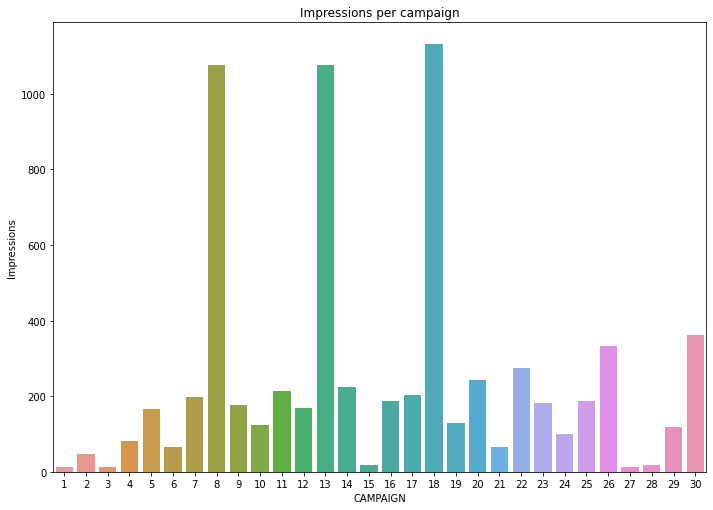

In [ ]:
camp_summ=camp_tab.groupby('CAMPAIGN')['household_key'].count().reset_index()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(x=camp_summ['CAMPAIGN'],y=camp_summ['household_key'])
ax.set(ylabel='Impressions')
plt.title('Impressions per campaign')
plt.show()

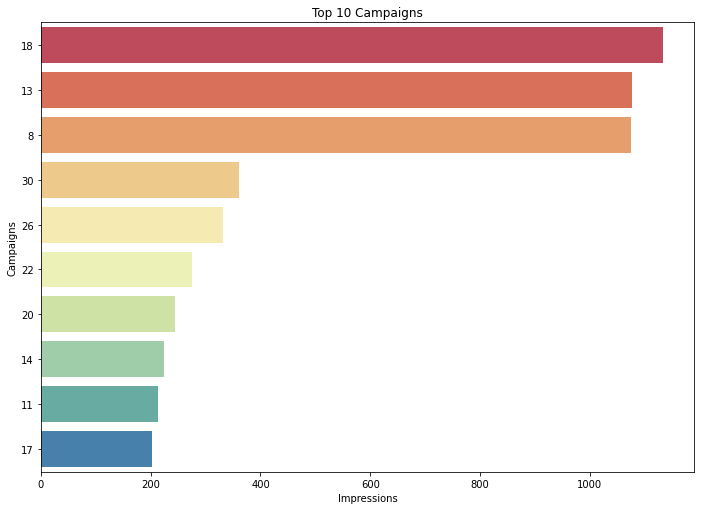

In [ ]:
camp_summ=camp_summ.sort_values('household_key',ascending=False).head(10)
camp_summ['CAMPAIGN']=camp_summ['CAMPAIGN'].astype(str)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(y=camp_summ['CAMPAIGN'],x=camp_summ['household_key'],orient='h',palette='Spectral')
ax.set(xlabel='Impressions', ylabel='Campaigns')
plt.title('Top 10 Campaigns')
plt.show()

In [ ]:
coupon=pd.read_csv('/content/drive/MyDrive/coupon.csv')
coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [ ]:
coupon.isna().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [ ]:
coupon_red=pd.read_csv('/content/drive/MyDrive/coupon_redempt.csv')
coupon_red.columns=['household_key','day','coupon_upc','campaign']
coupon_red.head()

,household_key,day,coupon_upc,campaign
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


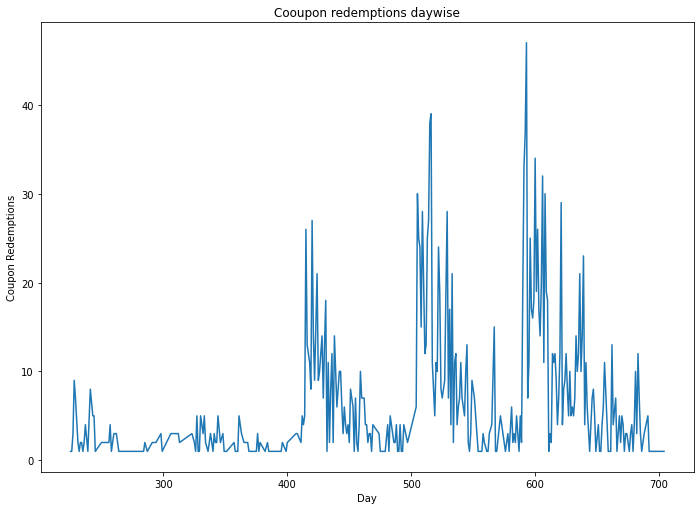

In [ ]:
day_coup=coupon_red.groupby(['day'])['coupon_upc'].count().reset_index()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.lineplot(x=day_coup['day'],y=day_coup['coupon_upc'],palette='Spectral')
ax.set(ylabel='Coupon Redemptions',xlabel='Day')
plt.title('Cooupon redemptions daywise')
plt.show()

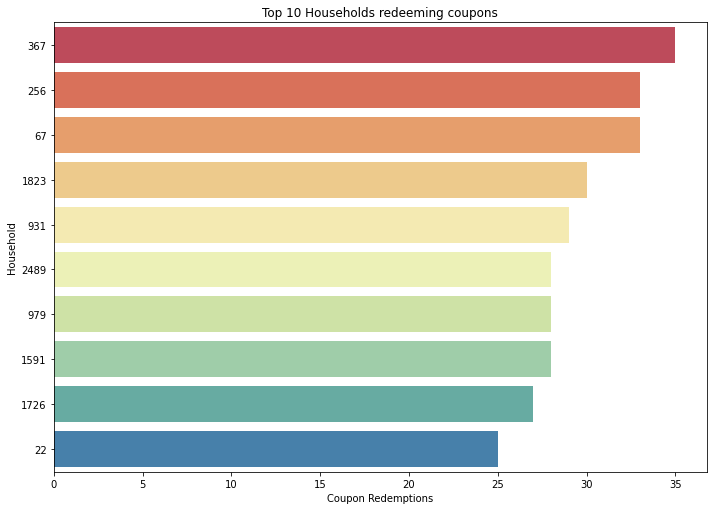

In [ ]:
top_hh_cou=coupon_red.groupby('household_key')['coupon_upc'].count().reset_index().sort_values('coupon_upc',ascending=False).head(10)
top_hh_cou['household_key']=top_hh_cou['household_key'].astype(str)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(y=top_hh_cou['household_key'],x=top_hh_cou['coupon_upc'],orient='h',palette='Spectral')
ax.set(xlabel='Coupon Redemptions', ylabel='Household')
plt.title('Top 10 Households redeeming coupons')
plt.show()

In [ ]:
coupon_red.isna().sum()

household_key    0
day              0
coupon_upc       0
campaign         0
dtype: int64

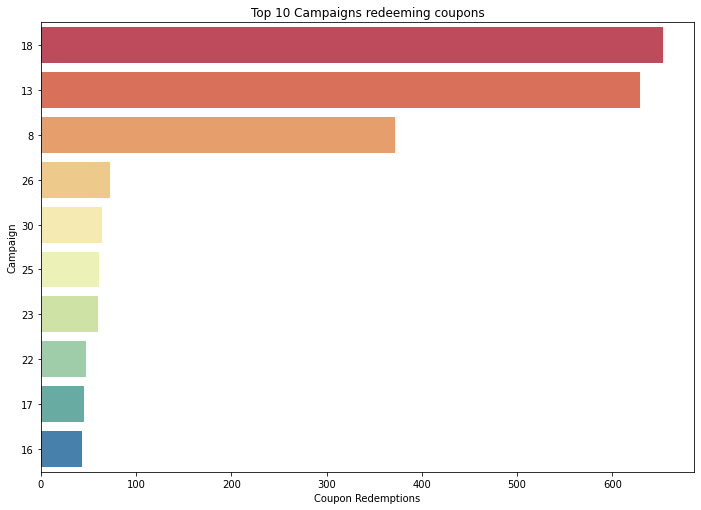

In [ ]:
camp_coup=coupon_red.groupby('campaign')['coupon_upc'].count().reset_index().sort_values('coupon_upc',ascending=False).head(10)
camp_coup['campaign']=camp_coup['campaign'].astype(str)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(y=camp_coup['campaign'],x=camp_coup['coupon_upc'],orient='h',palette='Spectral')
ax.set(xlabel='Coupon Redemptions', ylabel='Campaign')
plt.title('Top 10 Campaigns redeeming coupons')
plt.show()

In [ ]:
demo=pd.read_csv('/content/drive/MyDrive/hh_demographic.csv')
demo.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [ ]:
demo.isna().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
household_key          0
dtype: int64

In [ ]:
demo.columns = map(str.lower, demo.columns)

In [ ]:
demo.head()

,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


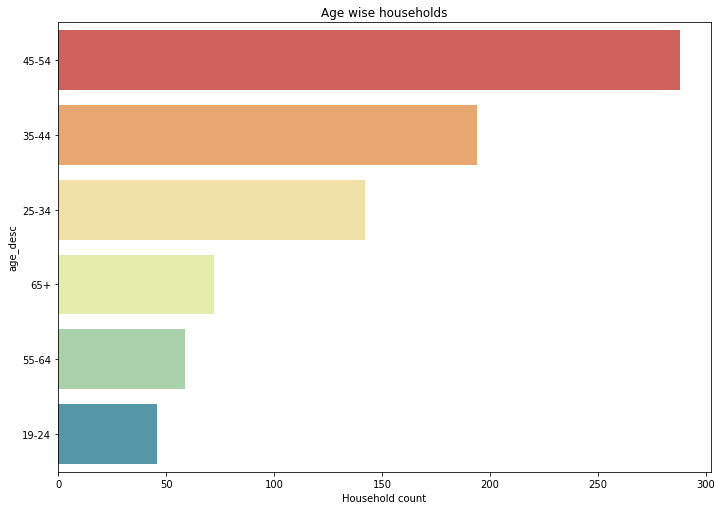

In [ ]:
age_demo=demo.groupby('age_desc')['household_key'].count().reset_index().sort_values('household_key',ascending=False)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(y=age_demo['age_desc'],x=age_demo['household_key'],palette='Spectral')
ax.set(xlabel='Household count')
plt.title('Age wise households')
plt.show()

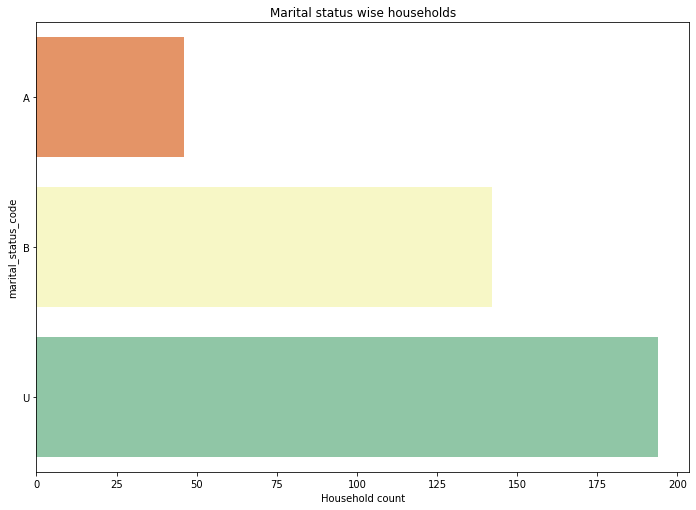

In [ ]:
mari=demo.groupby('marital_status_code')['household_key'].count().reset_index()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(y=mari['marital_status_code'],x=age_demo['household_key'],palette='Spectral')
ax.set(xlabel='Household count')
plt.title('Marital status wise households')
plt.show()

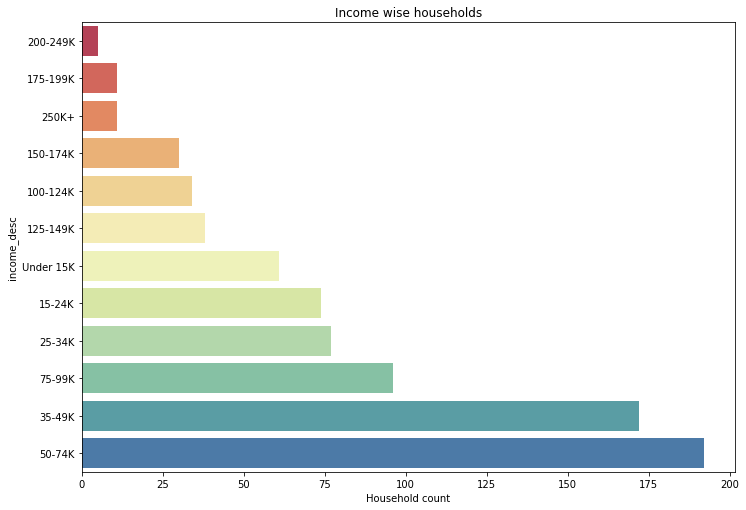

In [ ]:
inc=demo.groupby('income_desc')['household_key'].count().reset_index().sort_values('household_key',ascending=True)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(y=inc['income_desc'],x=inc['household_key'],palette='Spectral')
ax.set(xlabel='Household count')
plt.title('Income wise households')
plt.show()

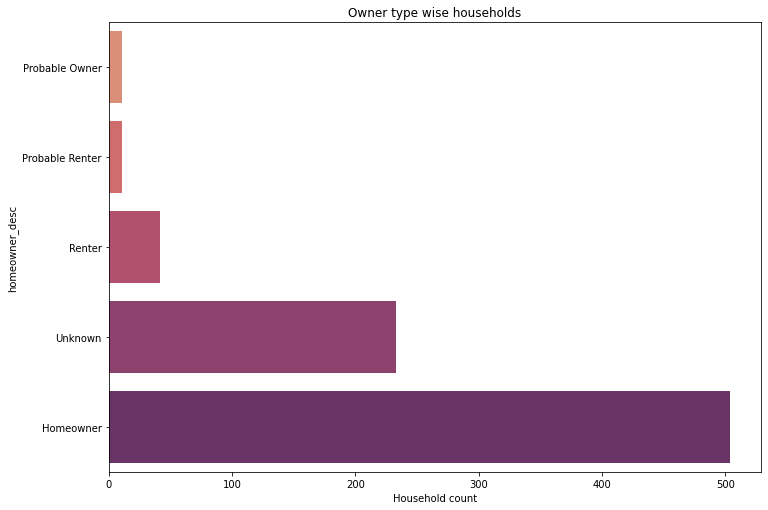

In [ ]:
own=demo.groupby('homeowner_desc')['household_key'].count().reset_index().sort_values('household_key',ascending=True)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(y=own['homeowner_desc'],x=own['household_key'],palette='flare')
ax.set(xlabel='Household count')
plt.title('Owner type wise households')
plt.show()

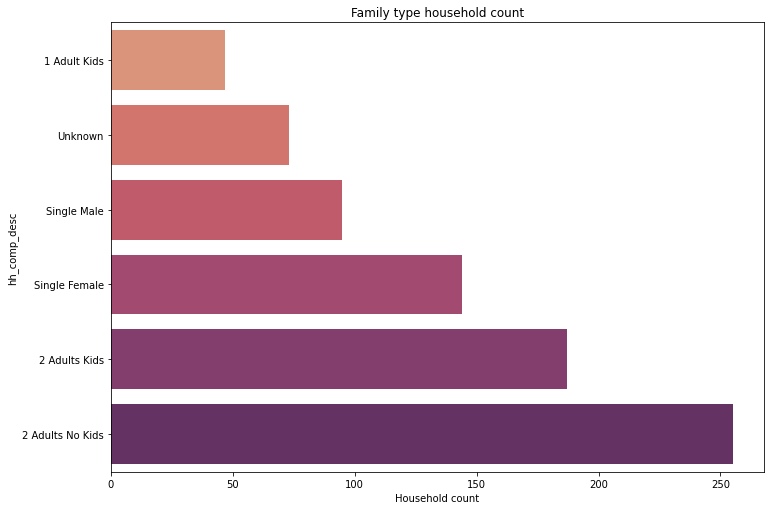

In [ ]:
fam=demo.groupby('hh_comp_desc')['household_key'].count().reset_index().sort_values('household_key',ascending=True)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(y=fam['hh_comp_desc'],x=fam['household_key'],palette='flare')
ax.set(xlabel='Household count')
plt.title('Family type household count')
plt.show()

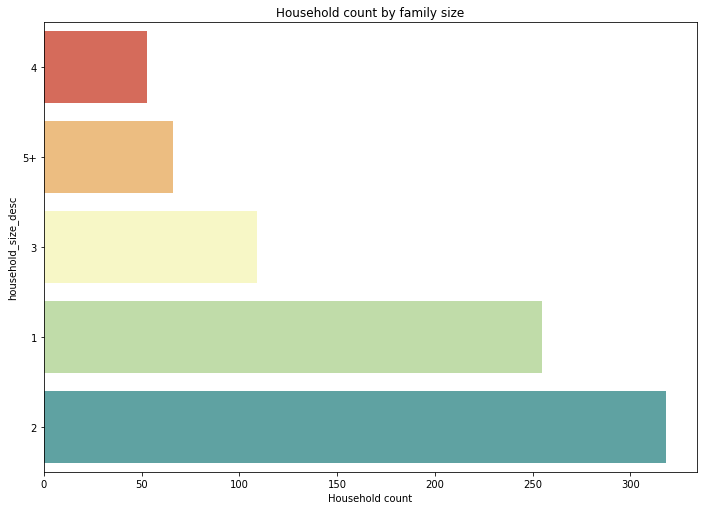

In [ ]:
size=demo.groupby('household_size_desc')['household_key'].count().reset_index().sort_values('household_key',ascending=True)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(y=size['household_size_desc'],x=size['household_key'],palette='Spectral')
ax.set(xlabel='Household count')
plt.title('Household count by family size')
plt.show()

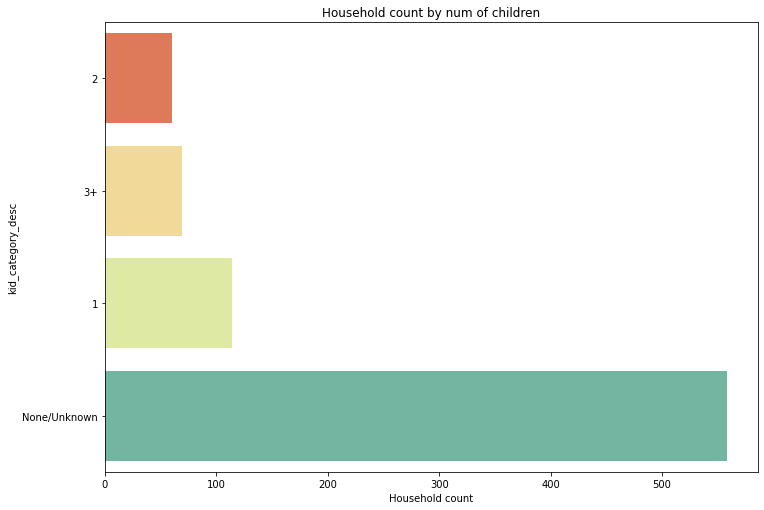

In [ ]:
kid=demo.groupby('kid_category_desc')['household_key'].count().reset_index().sort_values('household_key',ascending=True)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.barplot(y=kid['kid_category_desc'],x=kid['household_key'],palette='Spectral')
ax.set(xlabel='Household count')
plt.title('Household count by num of children')
plt.show()

In [ ]:
trans=pd.read_csv('/content/drive/MyDrive/transaction_data.csv')

In [ ]:
trans.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [ ]:
trans.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [ ]:
trans.columns = map(str.lower, trans.columns)

In [ ]:
trans[['store_id']].drop_duplicates() #582 stores

,store_id
0,364
11,31742
16,31642
21,412
24,337
...,...
2546371,213
2546420,1128
2558215,411
2559764,576


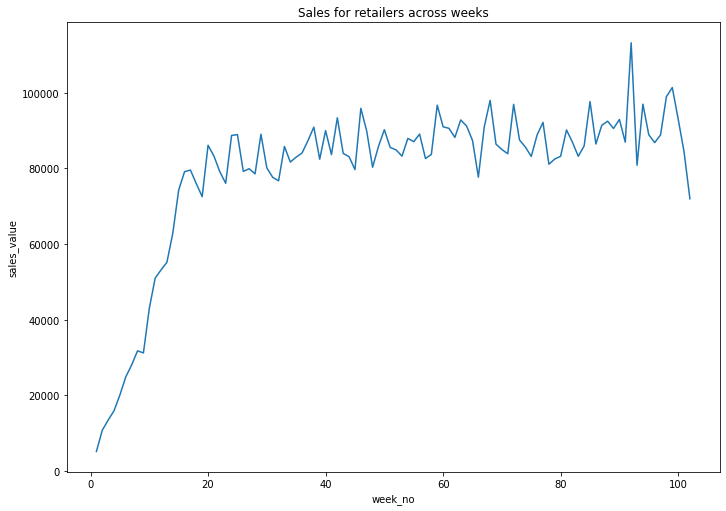

In [ ]:
sales_w=trans.groupby('week_no')['sales_value'].sum().reset_index()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=sales_w['week_no'],y=sales_w['sales_value'],palette='flare')
plt.title('Sales for retailers across weeks')
plt.show()

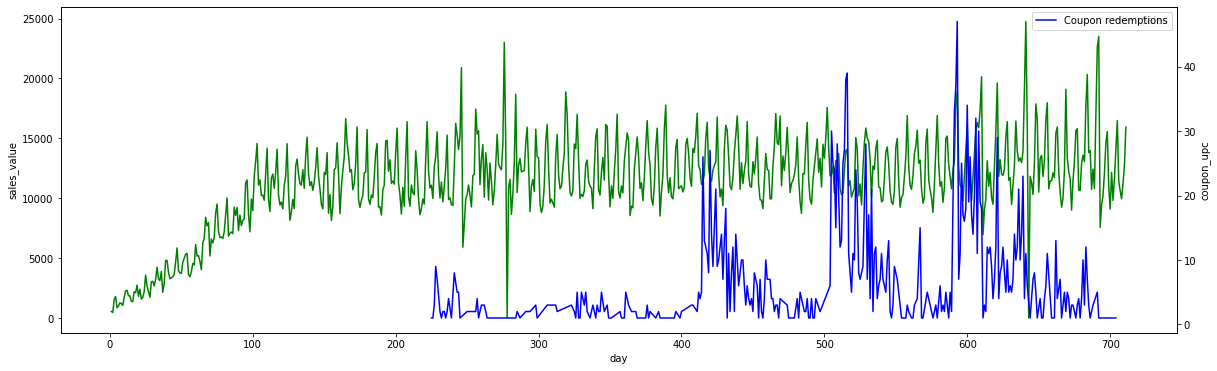

In [ ]:
sales_d=trans.groupby('day')['sales_value'].sum().reset_index()
a4_dims = (20, 6)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.lineplot(x=sales_d['day'],y=sales_d['sales_value'],palette='flare',color='green',label='Sales')
ax2 = ax.twinx()
ax2=sns.lineplot(x=day_coup['day'],y=day_coup['coupon_upc'],palette='Spectral',color='blue',label='Coupon redemptions')
plt.legend()
plt.show()